# D213 Advanced Data Analytics Performance Assessment, Task \# 1

Submitted by Ubaldo Martinez III, Time Series Modeling, Master of Science, Data Analytics, WGU

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives & Goals</a></li>
<li><a href="#PartB3">B1: Assumptions of Time Series Model</a></li>
<li><a href="#PartC1">C1: Graph Visualization of Time Series</a></li>
<li><a href="#PartC2">C2: Time Step Formatting of Realization</a></li>
<li><a href="#PartC3">C3: Stationarity of Series</a></li>
<li><a href="#PartC4">C4: Data Preparation</a></li>
<li><a href="#PartC5">C5: Copy of Prepared Data Set</a></li>
<li><a href="#PartD1">D1: Visualizations of Annotated Findings</a></li>
<li><a href="#PartD2">D2: Identification of ARIMA Model</a></li>
<li><a href="#PartD3">D3: Forecast Utilizing ARIMA Model</a></li>
<li><a href="#PartD4">D4: Output & Calculations Analysis</a></li>
<li><a href="#PartD5">D5: ARIMA Model Code</a></li>
<li><a href="#PartE1">E1: Analysis of Results</a></li>
<li><a href="#PartE2">E2: Visualization of Forecast</a></li>
<li><a href="#PartE3">E3: Recommended Actions</a></li>
<li><a href="#PartE">F: Reporting</a></li> 
<li><a href="#PartF">G: Code References</a></li>  
<li><a href="#PartG">H: Sources</a></li> 
</ul>

# Part I: Research Question

<a id='PartA1'></a>
## <span style="color:green">A1: Research Question</span>

Is it possible to reliably and accurately forecast the daily revenues of United Hospital in a manner that closely aligns with the actual observed daily revenues?

<a id="#PartA2"></a>
## <span style="color:green">A2: Objectives & Goals</span>

The aim of this analysis is to achieve precise daily revenue predictions for United Hospital by leveraging the available dataset. The methodology entails utilizing the first 80% of the dataset as a training set to forecast the subsequent 20% (test set). By employing observed values for comparative analysis instead of making future projections, we can effectively conduct an evaluation within the confines of this dataset. To accomplish this, we will employ an ARIMA time series model to accurately project the remaining 20% of data values, building upon the insights gained from analyzing the initial 80% of the data.

# Part II: Method Justification

<a id="#PartB"></a>
## <span style="color:green">B: Assumptions of Time Series Model</span>

Time series analysis, employing ARMA or ARIMA models, relies on several assumptions regarding the analyzed data:
- Time series data should lack trends and seasonality, exhibiting only stationarity.
- Data points behave consistently with no extraordinary outliers.
- Time series data consists of single observations recorded sequentially over equal time increments.
- The relationship between variables isn't significantly impacted over an entire time span.

Statistical properties of the series, such as mean, variance, and autocovariance, remain constant over time. For example, if time series is stationary, it suggests that the average monthly electricity consumption in the residential area remains relatively constant throughout the years. This means that there are no underlying trends or shifts in consumption patterns due to factors like population growth, changing lifestyles, or economic conditions. The absence of a trend allows us to make predictions based on historical consumption patterns without being influenced by long-term changes.

The points raised highlights an important aspect of time series analysis. The assumption that past data points are indicative of future behavior is based on the premise that the underlying relationship between the variables remains consistent over time. However, external factors, such as the Covid-19 pandemic, can significantly impact the relationship and introduce unpredictability into the forecasts. Therefore, when analyzing a dataset without accounting for such external forces, the forecasts may deviate significantly from the actual outcomes. It is crucial to consider contextual factors and incorporate them into the model to improve the accuracy of predictions, especially when dealing with events like the Covid-19 pandemic that can have a profound impact on hospital system operations and revenues.

While it is important to consider the potential limitations and factors that could impact the relationship being examined in the dataset, given the constraints of the rubric, we will assume that the data satisfies the assumption that past data points are indicative of future behavior. However, it is crucial to keep in mind concerns raised regarding additional hospitals opening, changes in offered services, and the impact of initial operations on the dataset. These factors can introduce uncertainties and should be taken into account when interpreting the results of the ARIMA analysis.

# Part III: Data Preparation

<a id="#PartC1"></a>
## <span style="color:green">C1: Graph Visualization of Time Series</span>

In [60]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

plt.rc("font", size=14)
plt.rcParams['font.family'] = 'Liberation Sans, sans-serif'
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("dark_background")

# Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [61]:
# Import Dataset From CSV File
df_o = pd.read_csv('Data/medical_time_series.csv') 

# Check Data Types & Values
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [62]:
# Display Dataset In A DataFrame
pd.set_option("display.max_columns", None)
df_o

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888
...,...,...
726,727,15.722056
727,728,15.865822
728,729,15.708988
729,730,15.822867


The observed dataset represents the revenue of two years in operation, with the first column 'Day' indicating the sequential number of days starting from Day 1 and ending with Day 731. The second column 'Revenue' represents the daily financial earnings or losses of United Hospital in millions of dollars. 

The first column will need to be converted into a DateTime object to hold more value as an index in our analysis. However, the data dictionary lacks context and specific dates, which requires us to choose a start date based on our own discretion. For the start date I choose January 1, 2015.

In [63]:
# Initialize Start Date (DateTime Format)
start_date = pd.to_datetime('2015-01-01')

# Convert Day Column To Differences In Time By Subtracting 1, Then Add The Difference (Time_Delta) To The Previously Established Start Date 
# (1 Day From Jan 1 2015, 2 Days From Jan 1 2015, ...)
df_o['Day'] = pd.to_timedelta(df_o['Day']-1, unit='D') + start_date

# Rename Columns
df_o.columns = ['date', 'revenue']

# Set Date As Index
df_o.set_index('date', inplace=True)

# Verify Dataframe
df_o

,revenue
date,
2015-01-01,0.000000
2015-01-02,-0.292356
2015-01-03,-0.327772
2015-01-04,-0.339987
2015-01-05,-0.124888
...,...
2016-12-27,15.722056
2016-12-28,15.865822
2016-12-29,15.708988


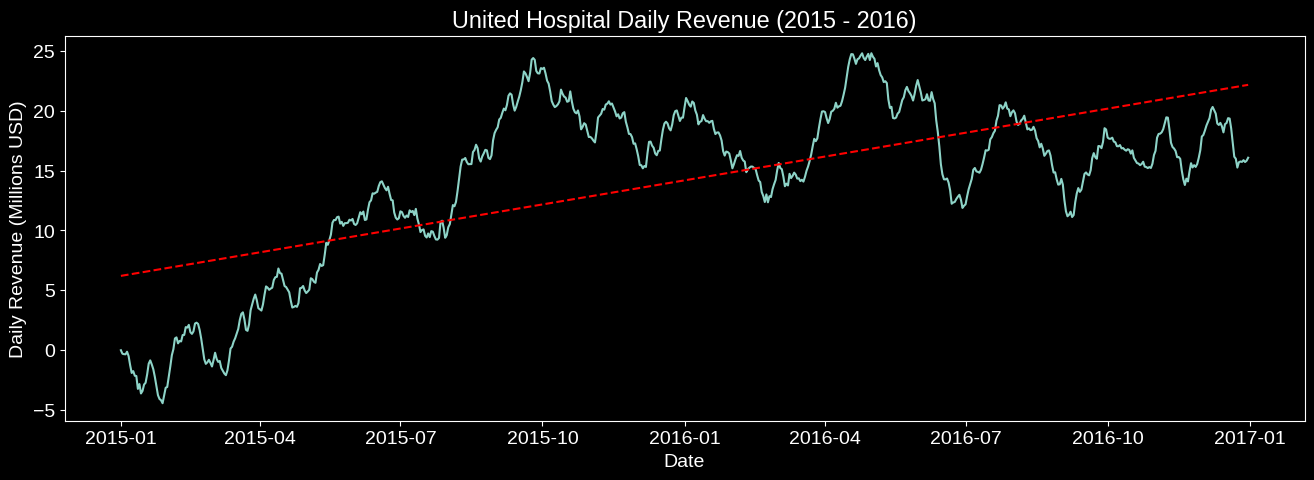

In [64]:
# Long X & Small Y Dictate A Wide Graph Figure
plt.figure(figsize = [16,5])

# Customize Graph
plt.title("United Hospital Daily Revenue (2015 - 2016)")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (Millions USD)")

# Plot Time Series Data
plt.plot(df_o)

# Generate Trend Line
x = mdates.date2num(df_o.index)
y = df_o.revenue
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot Trend Line
plt.plot(x, p(x), "r--")
plt.show()

The above line graph of United Hospital's daily revenue in millions of dollars (USD) indicates a clear upward trend over a two-year period (2015-2016), as evidenced by the included red trendline. The fluctuations throughout the graph could potentially indicate seasonal elements, although further analysis is required. Long-term seasonality, if present, would likely necessitate a larger dataset spanning multiple months of the year.

<a id="#PartC2"></a>
## <span style="color:green">C2: Time Step Formatting of Realization</span>

The time series comprises a DateTime index featuring a corresponding observation of the revenue in millions of dollars (USD) for United Hospital on each day. The DateTime index increases by one day for every observation (Jan 01, 2015, Jan 02, 2015, ..., Dec 31, 2016). The dataset is devoid of any measurement gaps, yet it does account for a leap year in 2016, which includes an additional day in February. By formatting DateTime as an object, it enables diverse potential aggregations (revenue by week, month, or year) and other data manipulations.

<a id="#PartC3"></a>
## <span style="color:green">C3: Stationarity of Series</span>

The data exhibits evident non-stationarity as it lacks a consistent pattern. A stationary time series is characterized by the absence of a trend. The aforementioned data distinctly illustrates an upward trend, as the daily revenue of the hospital system initially hovered around 5 million dollars for the first few months of the relevant period, and gradually stabilized between 15-20 million dollars per day towards the end. This discernible pattern undeniably signifies a definitive upward trend in daily revenue. 

<a id="#PartC4"></a>
## <span style="color:green">C4: Data Preparation</span>

To prepare the data for a time series analysis, a series of steps must be taken:
- The "Day" column should be converted into a correct DateTime format (refer to C1 for details).
- The fixed "Day" column needs to be converted into the index of the time series (refer to C1 for details).
- The "Revenue" data must undergo a transformation to become a stationary time series, devoid of any trend or seasonality.
- The data should be divided into training and test sets to facilitate the analysis.

In [65]:
# Perform Augmented Dicky-Fuller (ADF)
adfuller_results = adfuller(df_o.revenue)

# Results Of ADF w/ Test-Statistic & P-Value
print(f"Test-Statistic: {round(adfuller_results[0], 4)} \nP-Value: {round(adfuller_results[1], 4)}")

Test-Statistic: -2.2183 
P-Value: 0.1997


The null hypothesis of a Augmented Dicky-Fuller (ADF) test indicates the data is non-stationary. In order to reject the null hypothesis (data is not stationary), the ADF test results need to have a p-value under 0.05, to conclude the data is stationary. For the test statistic, a more negative value indicates a greater likelihood of the data being stationary. In this case, the observed test statistic of -2.2183 and the accompanying p-value of 0.1997 indicate non-stationarity, which is consistent with our previous conclusions. To achieve stationarity, a transformation is necessary by computing the difference between each successive data point using the `diff()` method. However, this transformation will result in an empty entry on the first date since there is no preceding date to calculate the difference from. To address this, we can use the `dropna()` function to remove this empty entry, thereby reducing the data series from 731 points to 730 (from Jan 2, 2015, to Dec 31, 2016).

Test-Statistic: -17.3748 
P-Value: 0.0


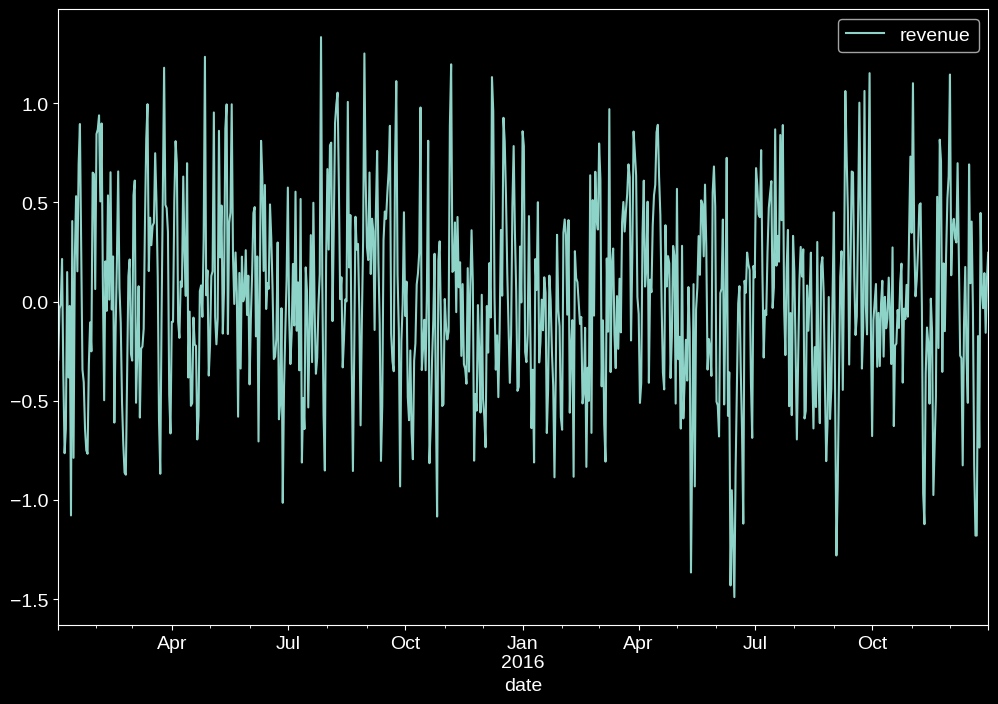

In [66]:
df_t = df_o.diff().dropna()

# Perform Augmented Dicky-Fuller (ADF)
adfuller_results = adfuller(df_t.revenue)

# Results Of ADF w/ Test-Statistic & P-Value
print(f"Test-Statistic: {round(adfuller_results[0], 4)} \nP-Value: {round(adfuller_results[1], 8)}")

# Plot To Verify Stationarity
df_t.plot();

After utilizing the differencing method (difference between each successive data point) and running the Augmented Dicky-Fuller test again, a plot was generated. The plot indicates data now being stationary, with no apparent trends or seasonality and the analysis may proceed to the splitting data into training and test datasets. 

In [67]:
# Generate Training & Test Set By Splitting Time Series
train, test = train_test_split(df_t, test_size=0.2, shuffle=False, random_state=369)

train

,revenue
date,
2015-01-02,-0.292356
2015-01-03,-0.035416
2015-01-04,-0.012215
2015-01-05,0.215100
2015-01-06,-0.366702
...,...
2016-08-03,-0.694370
2016-08-04,-0.282765
2016-08-05,0.104732


In [68]:
test

,revenue
date,
2016-08-08,0.263991
2016-08-09,-0.588690
2016-08-10,-0.550427
2016-08-11,0.081477
2016-08-12,-0.146587
...,...
2016-12-27,-0.032693
2016-12-28,0.143766
2016-12-29,-0.156834


<a id="#PartC5"></a>
## <span style="color:green">C5: Copy of Prepared Data Set</span>

Normally one file is provided to meet the requirements of providing a prepared dataset, but with this analysis two separate files are provided. One prepared dataset for training and another for testing labeled as 'task1_train_clean.csv' and 'task1_test_clean.csv'.

In [69]:
# Save Train Dataframe To CSV
train.to_csv('Data/task1_train_clean.csv')

# Save Test Dataframe To CSV
test.to_csv('Data/task1_test_clean.csv')

# Part IV: Model Identification & Analysis

<a id="#PartD1"></a>
## <span style="color:green">D1: Visualizations of Annotated Findings</span>

Although the data has been split into training and test sets, the following analysis will be based on the enire transformed dataset. 

#### Seasonality

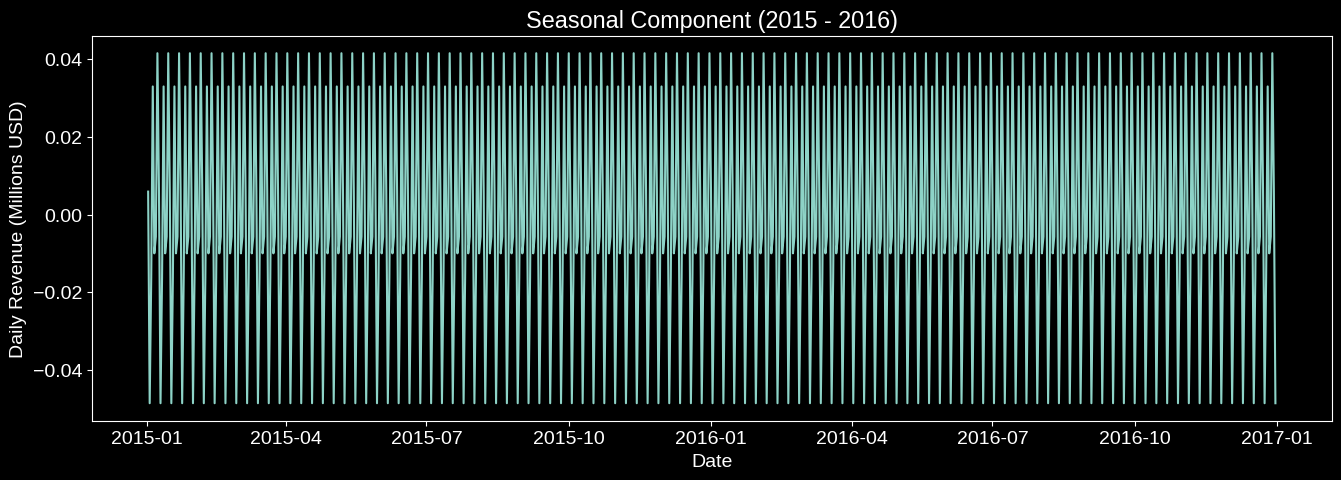

In [70]:
# Decompose Transformed Data
decomposed_data = seasonal_decompose(df_t)

# Long X & Small Y Dictate A Wide Graph Figure
plt.figure(figsize = [16,5])

# Customize Graph
plt.title("Seasonal Component (2015 - 2016)")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (Millions USD)")

# Plot Seasonal Component
plt.plot(decomposed_data.seasonal);

After analyzing the data and examining its seasonal component, we have identified a consistent and repetitive pattern. This pattern strongly suggests the presence of seasonality, although the magnitude of the seasonal component (represented on the y-axis) is quite small, hovering around 0.04 in either direction from zero at its most extreme. In contrast, the overall magnitude of the dataset ranges from 1.0 to 1.5. Considering the frequency of the observed seasonality, occurring multiple times within a few months, it is likely associated with the days of the week. To confirm this hypothesis, we can plot a month from the middle of the dataset and conduct a detailed analysis.

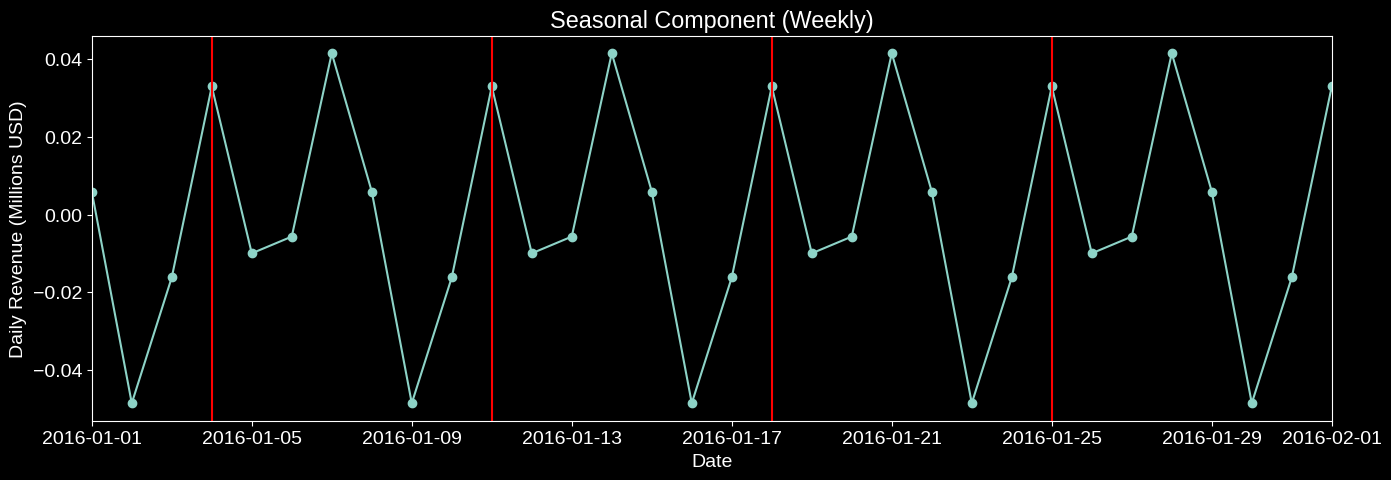

In [71]:
# Long X & Small Y Dictate A Wide Graph Figure
plt.figure(figsize = [16,5])

# Customize Graph
plt.title("Seasonal Component (Weekly)")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (Millions USD)")

# Plot Seasonal Component
plt.plot(decomposed_data.seasonal, marker='o')
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2016-02-01'))

# Generate Red Lines On Mondays
plt.axvline(x=pd.to_datetime('2016-01-04'), color='red')
plt.axvline(x=pd.to_datetime('2016-01-11'), color='red')
plt.axvline(x=pd.to_datetime('2016-01-18'), color='red')
plt.axvline(x=pd.to_datetime('2016-01-25'), color='red');

Demonstrated in the graph above, a clear trend of seasonality appears from January 1, 2016 to February 1, 2016. The red lines appear on Mondays, so we can utilize this as a reference point to demonstrate peak and through datapoints occurring during a seven-day period (Monday to Sunday). Peak datapoints are represented by the highest level in a plot while ‘through’ is demonstrated by the lowest level. The two peak datapoints appearing consistently in a weekly period are Mondays (the red line) and Thursdays (three data points to the right of the red line). The through datapoints are Tuesday (one point to the right of the red line) and Saturdays (two points to the left of the red line).  
 
The influence of this temporal pattern seems inconsequential when compared to the altered dataset. Earlier outcomes from the conducted ADF test suggest that the data exhibits stationarity. It is important to mention that the minor observable seasonal aspect could potentially be accommodated by a SARIMAX model, rather than an ARIMA model. In order to adhere to the rubric requirements, I will persist in utilizing an ARIMA model, even though a SARIMAX model may be more appropriate for this analysis. 

#### Trends

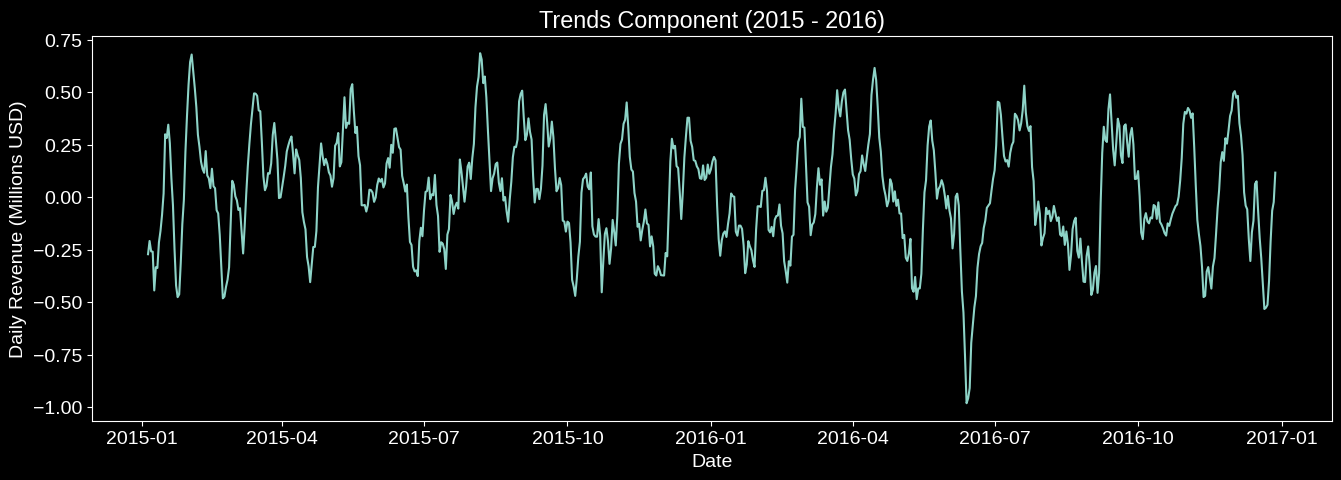

In [72]:
# Long X & Small Y Dictate A Wide Graph Figure
plt.figure(figsize = [16,5])

# Customize Graph
plt.title("Trends Component (2015 - 2016)")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (Millions USD)")

# Plot Trend Component
plt.plot(decomposed_data.trend);

Based on the Trends Component Plot, no apparent overall trend exist in the dataset other than an outlier in the summer of 2016-07.

#### Auto Correlation Functions 

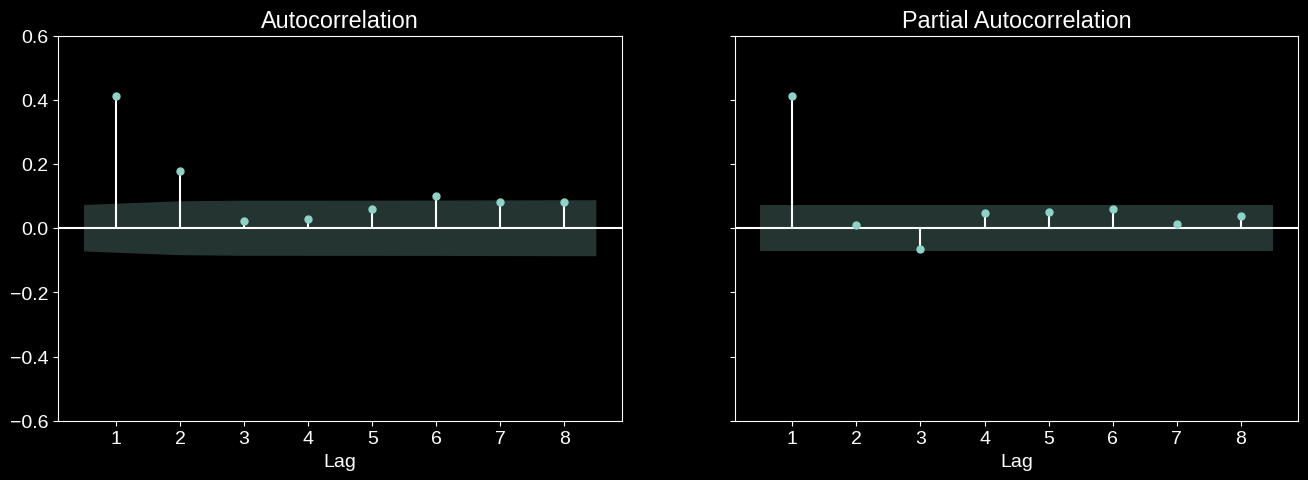

In [73]:
# Plot Auto-Correlation & Partial Auto-Correlation w/ Same Y-Axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,5], sharey=True)

# Plot ACF To 8 Lags
plot_acf(df_t, lags=8, zero=False, ax=ax1)
ax1.set_xlabel("Lag")

# Plot PACF To 8 Lags
plot_pacf(df_t, lags=8, zero=False,ax=ax2)
ax2.set_xlabel("Lag")

# Y-Axis Zoom In
plt.ylim(-0.6, 0.6);

To determine whether the data is an AR (autogression) or MA (moving average) model ACF and PACF are utilized. If the ACF tails off (decays to zero asymptotically) and PACF cuts off then it is a AR model. If the ACF cuts off and the PACF tails off then it is a MA model. Datapoints outside the shaded area statistically significant and anything within the shaded area may be ignored. Starting with the ACF plot, it appears to tail off at 2 lags, while the PACF cuts off at 1. Based on these observations it can be concluded the data is best suited to an AR(1) model. 

#### Spectral Density

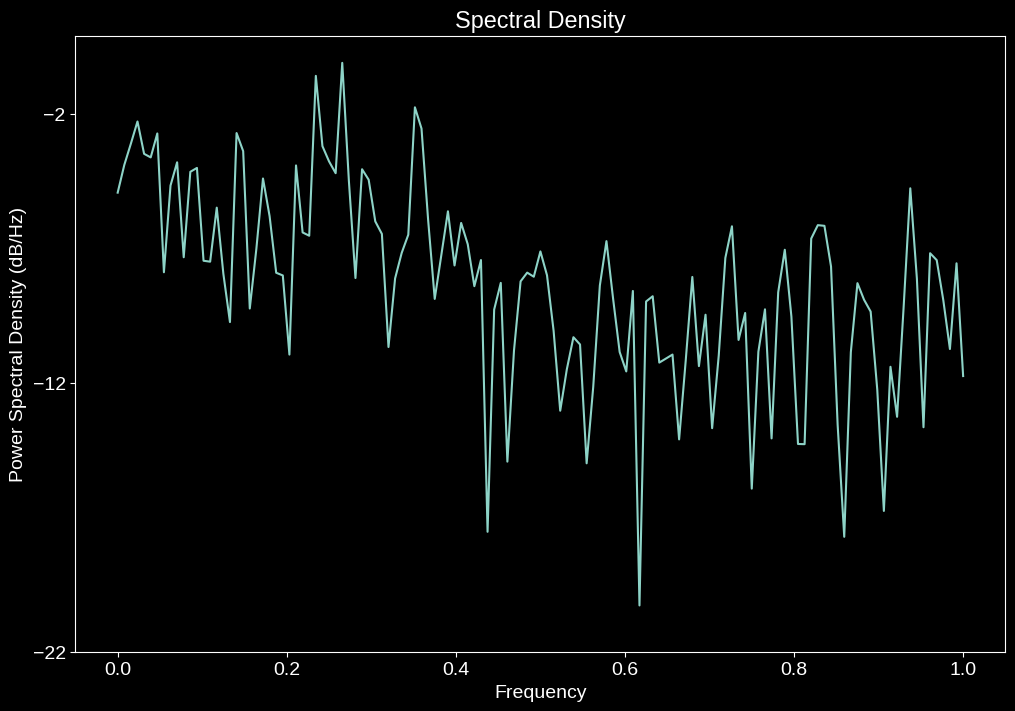

In [74]:
plt.psd(x=df_t.revenue)
plt.grid(None)
plt.title("Spectral Density");

The plot above demonstrates the power spectral density of the transformed time series. 

#### Decomposed Time Series

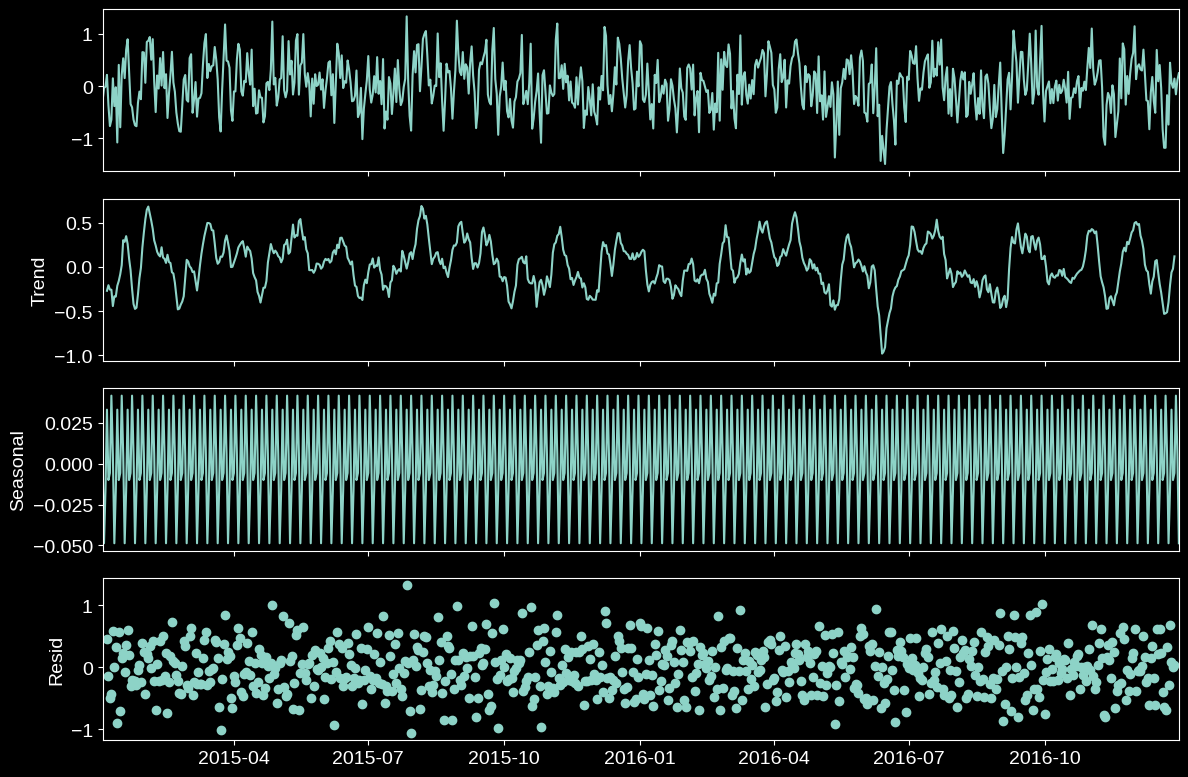

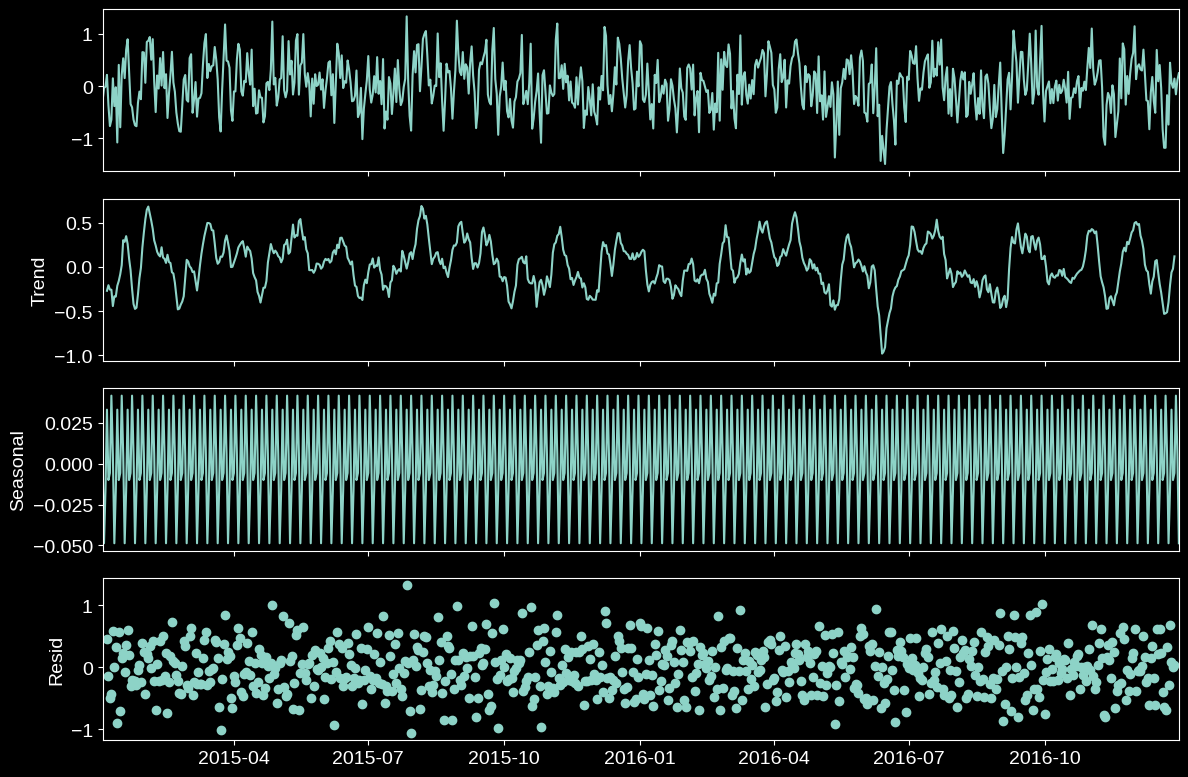

In [75]:
decomposed_data.plot()

The plots above demonstrate the decomposed data of the transformed time series.

#### Confirmed Lack of Trends in Residuals of Decomposition 

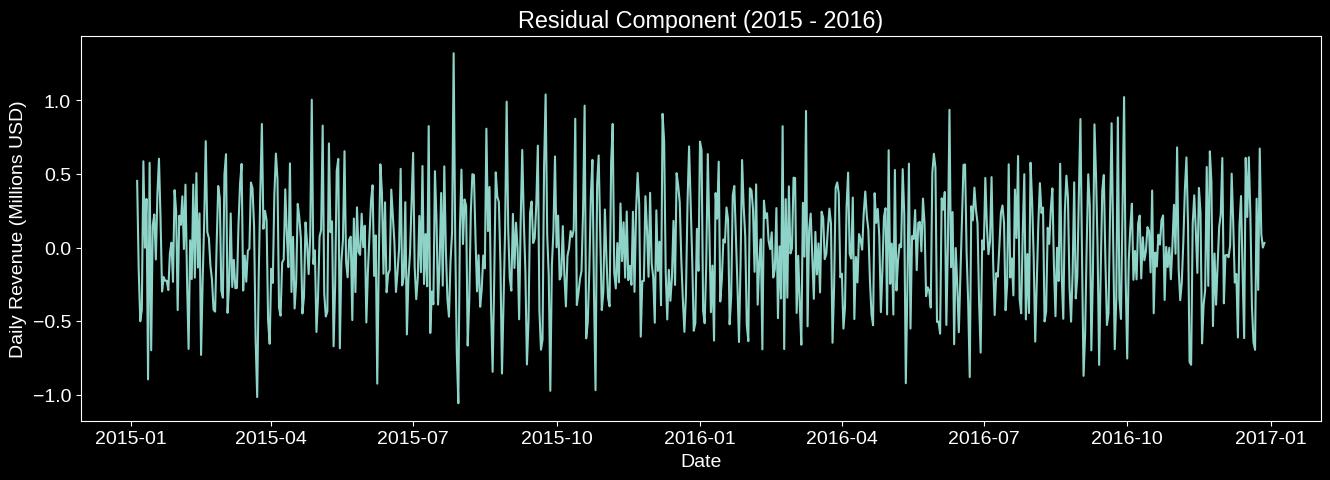

In [76]:
# Long X & Small Y Dictate A Wide Graph Figure
plt.figure(figsize = [16,5])

# Customize Graph
plt.title("Residual Component (2015 - 2016)")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (Millions USD)")

# Plot Residual Component
plt.plot(decomposed_data.resid);

The residual plot of decomposition doesn't appear to have any evident trends. 

<a id="#PartD2"></a>
## <span style="color:green">D2: Identification of ARIMA Model</span>

Based on the generated ACF and PACF plots, it was concluded the best suited model was AR(1). 

In [77]:
model = ARIMA(train, order=(1, 0, 0), freq='D')
r = model.fit()
print(r.summary())

                               SARIMAX Results                                
Dep. Variable:                revenue   No. Observations:                  584
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -350.349
Date:                Mon, 10 Jul 2023   AIC                            706.698
Time:                        19:07:12   BIC                            719.808
Sample:                    01-02-2015   HQIC                           711.808
                         - 08-07-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.031      1.063      0.288      -0.028       0.093
ar.L1          0.4079      0.038     10.748      0.000       0.333       0.482
sigma2         0.1943      0.012     15.948      0.0

After examining the coefficients, we can derive the resulting ARIMA equation:

$$ X_t = 0.4079(X_{(t-1)}) + 0.0194 + a_t $$

<a id="#PartD3"></a>
## <span style="color:green">D3: Forecast Utilizing ARIMA Model</span>

The testing dataset consists of 146 rows, and the objective is to predict values for each of these 146 instances. This provides a basis for comparison, allowing us to evaluate the accuracy of our predictions by comparing them to the actual values present in the testing dataset.

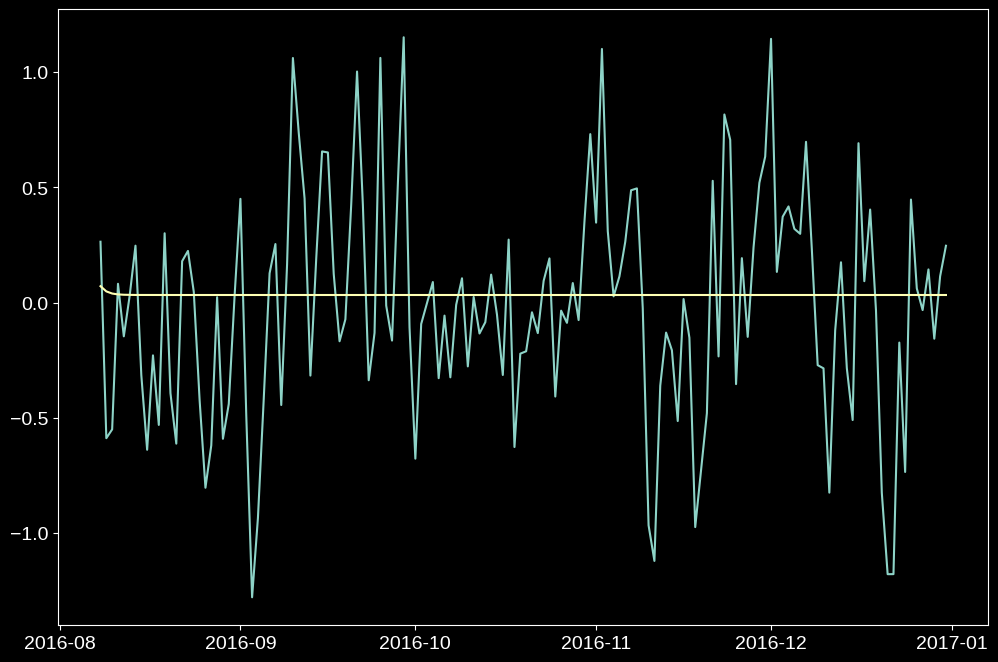

In [78]:
forecast = r.get_prediction(start = 584, end = 729, dynamic = True)
plt.plot(test)
plt.plot(forecast.predicted_mean);

In [79]:
print(forecast.predicted_mean)

2016-08-08    0.071071
2016-08-09    0.048405
2016-08-10    0.039159
2016-08-11    0.035388
2016-08-12    0.033850
                ...   
2016-12-27    0.032791
2016-12-28    0.032791
2016-12-29    0.032791
2016-12-30    0.032791
2016-12-31    0.032791
Freq: D, Name: predicted_mean, Length: 146, dtype: float64


After careful examination, it is evident that the forecast lacks effectiveness. the results from the forcast don't represent a direct prediction of the daily revenue for United Hospital, instead it signifies a forecast of the `daily difference` in revenue. The plot demonstrates a slight bump before tampering downward and anchoring to the value of 0.032791, which can be interpreted as predicting an incremental increase of 0.032791 from the previous day. Consequently, we can invert our previous transformation and plot the predicted data against the observed data in the test set. Furthermore, we will calculate the confidence intervals for the forecast and include them in the plot.

In [80]:
# Assign Forecast Differences Into A Temporary Dataframe
temp_forecast = pd.DataFrame(forecast.predicted_mean)

# Create Consistent Labels
temp_forecast.rename(columns={'predicted_mean' : 'revenue'}, inplace=True)

# Concat A Copy Of Train (Through Aug 07 2016) & Copy Forecast Values (Forward From Aug 08 2016)
df_w_forecast = pd.concat([train.copy(), temp_forecast.copy()])

# Invert The Differences Using CumSum After Generating A DataFrame With Differences In Daily Revenue
df_w_forecast = df_w_forecast.cumsum()

# Verify Output For Expected Values 
df_w_forecast

,revenue
2015-01-02,-0.292356
2015-01-03,-0.327772
2015-01-04,-0.339987
2015-01-05,-0.124888
2015-01-06,-0.491590
...,...
2016-12-27,24.033683
2016-12-28,24.066474
2016-12-29,24.099265
2016-12-30,24.132056


In [81]:
# Calculate Confidence Intervals From Forecast Data
conf_intervals = forecast.conf_int()

# Confidence Limits Are Transformed Back To Daily Revenue
conf_intervals

,lower revenue,upper revenue
2016-08-08,-0.792856,0.934998
2016-08-09,-0.884621,0.981430
2016-08-10,-0.904871,0.983190
2016-08-11,-0.910461,0.981237
2016-08-12,-0.912301,0.980001
...,...,...
2016-12-27,-0.913421,0.979002
2016-12-28,-0.913421,0.979002
2016-12-29,-0.913421,0.979002
2016-12-30,-0.913421,0.979002


In [82]:
# Establish a dataframe to match the confidence intervals dataframe, including the UNTRANSFORMED data from 2016-08-07
p_row = pd.DataFrame({'lower revenue': [19.312734], 'upper revenue' : [19.312734], 'date' : ['2016-08-07']})

# Convert given date string to datetime and then set as index
p_row['date'] = pd.to_datetime(p_row['date'])
p_row.set_index('date', inplace=True)
p_row

,lower revenue,upper revenue
date,,
2016-08-07,19.312734,19.312734


In [83]:
# Concatenate Prior Row & Confidence Intervals
conf_intervals = pd.concat([p_row, conf_intervals])

# Un-Transform Confidence Intervals
conf_intervals = conf_intervals.cumsum()

# Make Certain First Row Of Preceding Forecast Is Omitted
conf_intervals = conf_intervals.loc['2015-08-08' : '2016-12-31']

# Verify Un-Transformed Confidence Intervals
conf_intervals

,lower revenue,upper revenue
2016-08-07,19.312734,19.312734
2016-08-08,18.519878,20.247732
2016-08-09,17.635257,21.229163
2016-08-10,16.730386,22.212353
2016-08-11,15.819925,23.193590
...,...,...
2016-12-27,-110.230261,158.297627
2016-12-28,-111.143681,159.276629
2016-12-29,-112.057102,160.255632
2016-12-30,-112.970522,161.234634


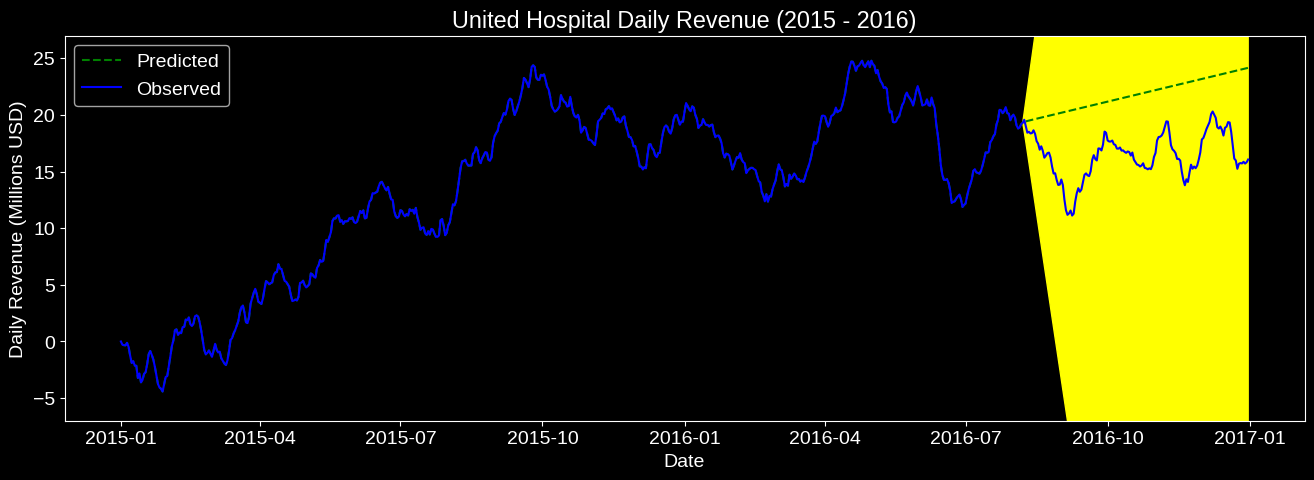

In [84]:
# Long X & Small Y Dictate A Wide Graph Figure
plt.figure(figsize = [16,5])

# Customize Graph
plt.title("United Hospital Daily Revenue (2015 - 2016)")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (Millions USD)")

# Plot Forcast Data
plt.plot(df_w_forecast, color = 'green', linestyle = 'dashed')

# Plot Original Data (Untransformed Train & Test Dataset)
plt.plot(df_o, color = 'blue')

# Plot Confidence Intervals
plt.fill_between(conf_intervals.index, conf_intervals['lower revenue'], 
                 conf_intervals['upper revenue'], 
                 color = 'yellow')

# Y-Axis Zoom In
plt.ylim(-7, 27)

# Generate Legend To Distinguish Predicted From Observed Values
plt.legend(['Predicted', 'Observed'])
plt.show();

The provided graph illustrates the daily revenue of United Hospital, encompassing the projected figures for the final 20% of the period (Aug 08, 2016 - Dec 31, 2016) based on the preceding 80% of the period, along with the corresponding actual values for that timeframe. It is worth noting that the model exhibits a broad confidence interval, which becomes even more pronounced when extrapolating over an extensive forecasting period of 146 days in advance. Consequently, this amplifies the uncertainty range to an impractical extent.

In [85]:
# Calculate RMSE (Root Mean Square Error) Of Forcast Data Against The Observed Data (Untransformed)
rmse = mean_squared_error(df_o.loc['2016-08-08' : '2016-12-31'], df_w_forecast.revenue.loc['2016-08-08' : '2016-12-31'], 
                          squared=False)

print(f"RMSE Of Model: {round(rmse, 5)}")

RMSE Of Model: 5.7584


<Figure size 2500x2500 with 0 Axes>

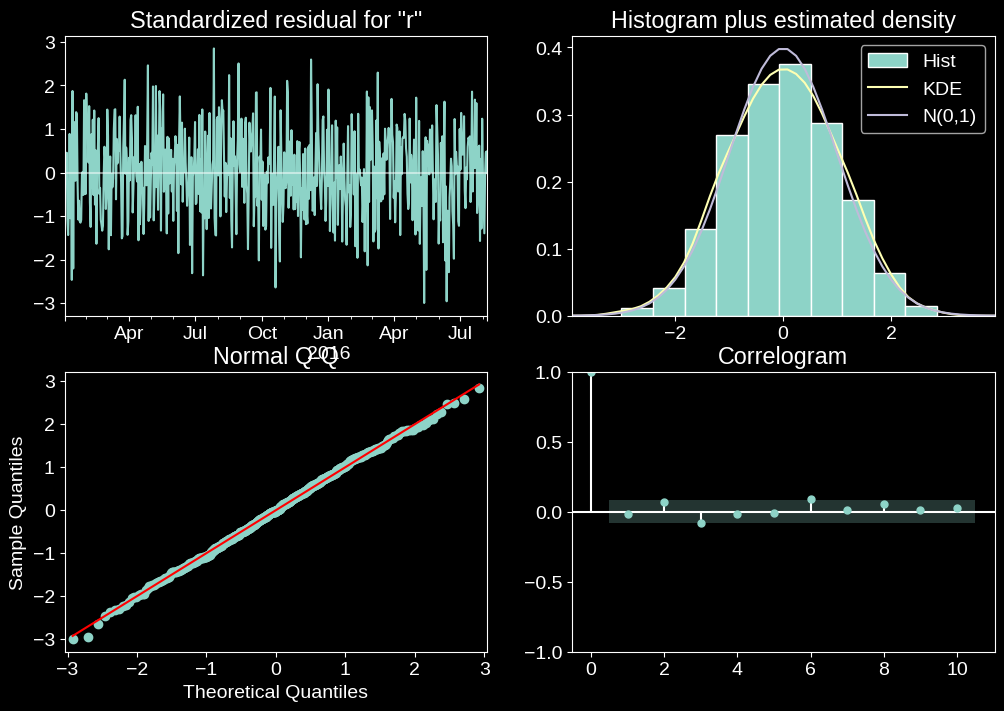

In [86]:
plt.figure(figsize = [25,25])
r.plot_diagnostics();

<a id="#PartD4"></a>
## <span style="color:green">D4: Output & Calculations Analysis</span>

All calculations performed, along with the output of results are demonstrated above. 

<a id="#PartD5"></a>
## <span style="color:green">D5: ARIMA Model Code</span>

All code utilized to implement the model has been provided. 

# Part V: Data Summary & Implications

<a id="#PartE1"></a>
## <span style="color:green">E1: Analysis of Results</span>

After transformation of the dataset, autocorrelation and partial autocorrelation functions were utilized to determine whether the data aligned better with an AR (autoregressive) or MA (moving average) model. The behavior observed for ACF, was a tailing off at 2 lags and PACF cutting off at 1, suggesting the data is most suitable for an AR(1) model. While alternative approaches exist to determine the optimal order of an ARIMA model, I believe this method adequately satisfies the requirements outlined in the assignment rubric. The ARIMA model is assigned an overall order of (1, 0, 0) and upon fitting the ARIMA model to the training data, it reveals the equation for this dataset as:

$$ X_t = 0.4079(X_{(t-1)}) + 0.0194 + a_t $$

From the 731 data points in the dataset, the first 584 (80%) values represent the training set while the remaining 146 (20%) make up the testing set. This amounts to predicing 5 months worth of revenue based on 19 months of data. The justification for splitting the data 80/20 was due too the initial 3-4 months demonstrating daily revenue fluctuating near zero followed by 4-5 months of steadily increasing revenue until reaching a point where the daily revenue was consistently between 15 to 25 million per day. 

If the observed plateau accurately reflects the hospital system's actual performance, the initial 7-9 months of operation should be considered a transitional phase and should not be used to predict future performance. Consequently, excluding approximately 25% of the dataset, which contains non-predictive data from that period, would likely enhance the model's forecasting capabilities.

The evaluation of the model's forecast in comparison to alternative models can be accomplished through the utilization of the root mean squared error (RMSE). The RMSE value attained by this particular model stands at 5.7584. A superior model is distinguished by a diminished RMSE, signifying enhanced accuracy. This metric serves as a benchmark for comparing the model to others. Furthermore, the model's independent performance can be assessed by examining the generated output derived from the diagnostic_plots() function.

<Figure size 2500x2500 with 0 Axes>

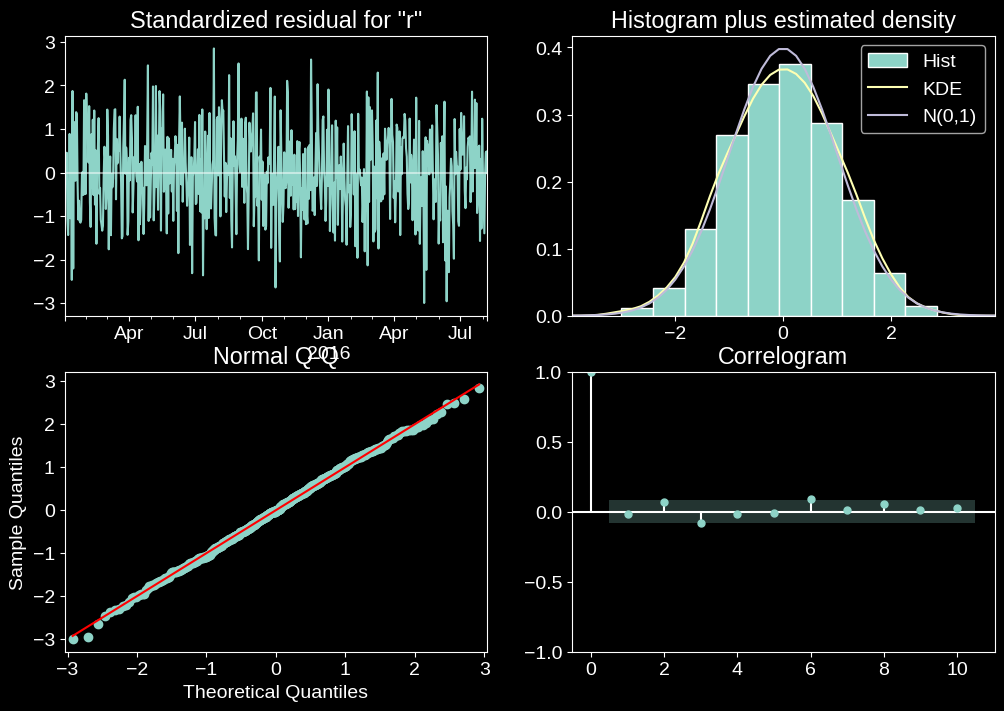

In [87]:
plt.figure(figsize = [25,25])
r.plot_diagnostics();


The `plot_diagnostics()` function generates a set of plots to evaluate the performance of the model.

- <b>Top Left:</b> 
    Plot displays the standardized residuals, which should not exhibit any discernible patterns. In this case, no apparent patterns are observed.
    
- <b>Top Right:</b> 
    Plot displays a histogram with a KDE (Kernel Density Estimate) curve. The KDE curve should closely resemble a normal distribution, which is the case here.
- <b>Bottom Left:</b> 
    Plot displays Normal Q-Q (Quantile-Quantile). Ideally, most or all data points should fall on the red line, indicating conformity to the normal distribution, which the condition holds true.
- <b>Bottom Right:</b> 
    Plot displays a correlogram, indicating correlations at different lags. In a well-fitted model, correlations for lag values greater than zero should be insignificant and fall within the shaded area. However, this model exhibits some elements at lag(3) and lag(6) that appear to be close to the threshold of significance.

The results of the correlogram suggest that the model may have slightly higher correlation for specific lag values. This is likely related to the minimal seasonal effect observed earlier, based on the day of the week. Nevertheless, from a statistical standpoint, this model does not seem to pose significant issues. However, it is worth noting that it lacks practical significance due to its imprecise forecasting, considering only a slight linear upward trend in daily revenues. Consequently, this conclusion has limited value, particularly considering the confidence range associated with the forecast.

<a id="#PartE2"></a>
## <span style="color:green">E2: Visualization of Forecast</span>

The final visualization showcases both the original observed data and the forecast generated by the model, along with the corresponding confidence interval.

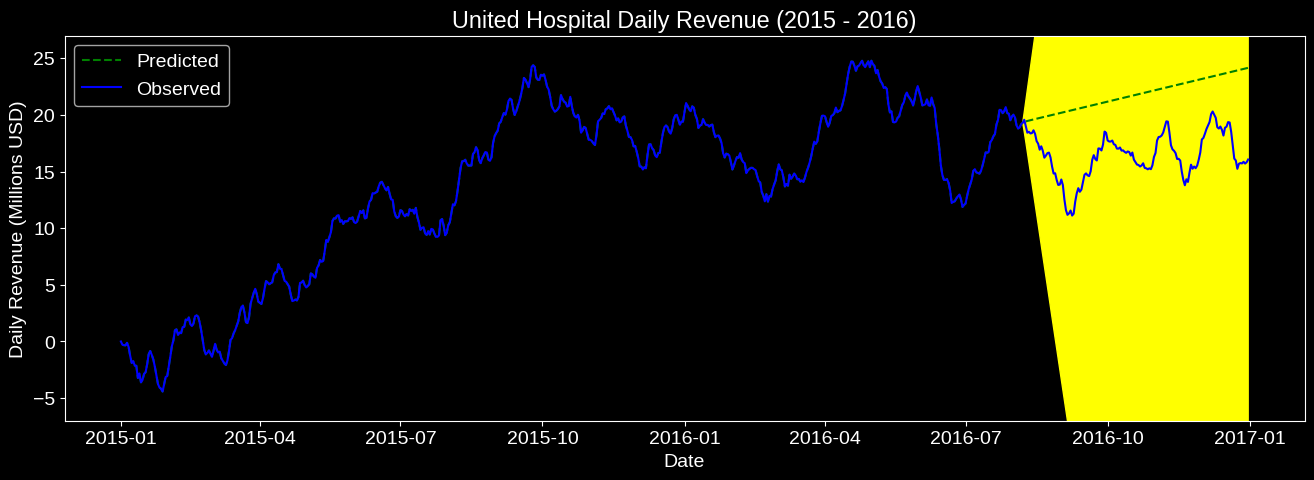

In [88]:
# Long X & Small Y Dictate A Wide Graph Figure
plt.figure(figsize = [16,5])

# Customize Graph
plt.title("United Hospital Daily Revenue (2015 - 2016)")
plt.xlabel("Date")
plt.ylabel("Daily Revenue (Millions USD)")

# Plot Forcast Data
plt.plot(df_w_forecast, color = 'green', linestyle = 'dashed')

# Plot Original Data (Untransformed Train & Test Dataset)
plt.plot(df_o, color = 'blue')

# Plot Confidence Intervals
plt.fill_between(conf_intervals.index, conf_intervals['lower revenue'], 
                 conf_intervals['upper revenue'], 
                 color = 'yellow')

# Y-Axis Zoom In
plt.ylim(-7, 27)

# Generate Legend To Distinguish Predicted From Observed Values
plt.legend(['Predicted', 'Observed'])
plt.show();

The model forecast displays a minimal but steady increase in daily revenues for United Hospital. The attempt to forecast United Hospital revenue is technically successful; however, the forecast projects increasing revenue, while observed values demonstrate the contrary with a steep drop. Reflecting back on the research question of closely aligning with the actual observed daily revenues accurately and effectively, I would have to declare the analysis as unsuccessful.

<a id="#PartE3"></a>
## <span style="color:green">E3: Recommended Actions</span>

Future forecasting endeavors would gain an advantage by employing an expanded dataset while excluding the initial 7-9 months of the hospital system's data due to the revenue in the early months being tied to the 'launch' phase. Also, having supplementary context proves invaluable, specifically by documenting the commencement of new hospitals' operations, allowing for their inclusion or exclusion in the dataset. This ensures a consistent basis for comparison over time. The dataset provided is deficient in the contextual information, as well as the non-predictive characteristic observed in the initial one-third of the data. 

The suggested approach entails gathering revenue data on a per-hospital level, instead of consolidating it into a solitary organization-wide container. This approach offers enhanced granularity for hospital comparisons while accommodating contextual factors specific to each facility. Consequently, the outcomes of these models can be merged to produce a comprehensive organizational projection, which is expected to yield significantly improved accuracy compared to the previous methodology.  

# Part VI: Reporting

<a id="#PartF"></a>
## <span style="color:green">F: Reporting</span>

The analysis is submitted as both a Jupyter Notebook .ipynb file and PDF. 

<a id="#PartG"></a>
## <span style="color:green">G: Code References</span>

```
GeeksforGeeks. (2023). Python  Convert day number to date in particular year. GeeksforGeeks. 
    https://www.geeksforgeeks.org/python-convert-day-number-to-date-in-particular-year/#

DataCamp. (2023, June 20). ARIMA Models in Python Course. https://www.datacamp.com/courses/arima-models-in-python

Chae, J. (2021, December 27). Times Series and Trends with Plotly and Pandas | Towards Data Science. Medium. 
    https://towardsdatascience.com/time-series-and-logistic-regression-with-plotly-and-pandas-8b368e76b19f

Jake @Scicoding. (2023). 3 Ways of Calculating Power Spectral Density in Python. Scicoding. 
    https://scicoding.com/calculating-power-spectral-density-in-python/
```

<a id="#PartH"></a>
## <span style="color:green">H: Source References</span>

```
Howell, E. (2023, January 3). How To Analyse Your Time Series Model Using Residuals. Medium. 
    https://towardsdatascience.com/how-to-analyse-your-time-series-model-using-residuals-f980f597332e

DataCamp. (2023, June 20). ARIMA Models in Python Course. https://www.datacamp.com/courses/arima-models-in-python
```